In [33]:
# 🧠 Task 02 — EDA & Cleaning on Titanic Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure folder structure
os.makedirs("outputs/figures", exist_ok=True)

# Load datasets
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print("✅ Datasets loaded successfully!")
print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head()


✅ Datasets loaded successfully!
Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# Check for missing data
missing = train.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])


Missing values per column:
 Age         177
Cabin       687
Embarked      2
dtype: int64


In [35]:
# Fill missing Age with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill Embarked with most common value
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Fill Fare in test with median
test['Fare'].fillna(test['Fare'].median(), inplace=True)

print("✅ Missing values handled successfully!")


✅ Missing values handled successfully!


C:\Users\HP\AppData\Local\Temp\ipykernel_11732\2694169942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11732\2694169942.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [36]:
# Convert 'Sex' and 'Embarked' to numeric
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


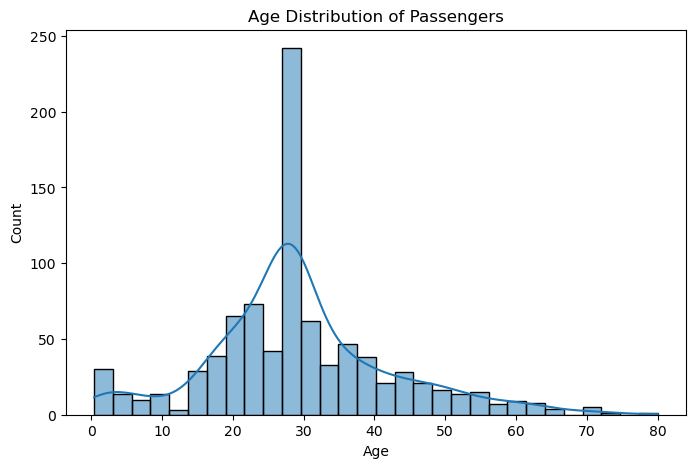

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig("outputs/figures/task02_age_distribution.png")
plt.show()


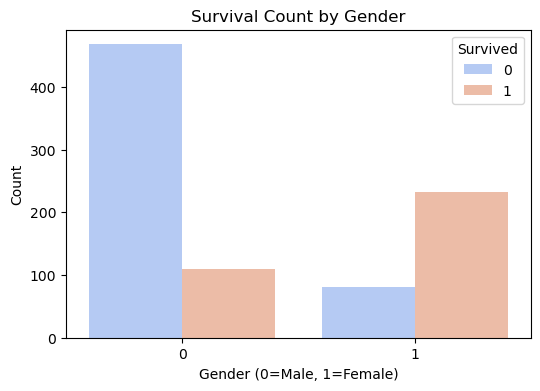

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=train, palette='coolwarm')
plt.title("Survival Count by Gender")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Count")
plt.savefig("outputs/figures/task02_gender_survival.png")
plt.show()


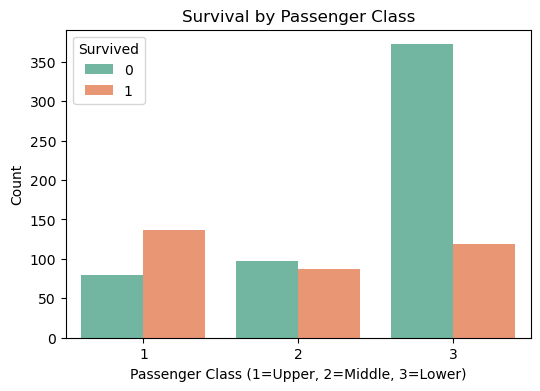

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=train, palette='Set2')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class (1=Upper, 2=Middle, 3=Lower)")
plt.ylabel("Count")
plt.savefig("outputs/figures/task02_class_survival.png")
plt.show()


In [40]:
train.to_csv("data/train_cleaned.csv", index=False)
test.to_csv("data/test_cleaned.csv", index=False)
print("✅ Cleaned datasets saved in data/ folder.")


✅ Cleaned datasets saved in data/ folder.
